<a href="https://colab.research.google.com/github/helloitsdaksh/Tensorflow_colab/blob/main/02_Exercise_Extra_Curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXERCISE

##Q3

In [1]:
from sklearn.datasets import make_moons


In [2]:
X,y = make_moons(n_samples= 1000,
                 noise = 0.03,
                 random_state = 42)

In [3]:
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
moons = pd.DataFrame({'X0':X[:,0],'X1':X[:,1], 'Label': y})

In [6]:
moons.head()


,X0,X1,Label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


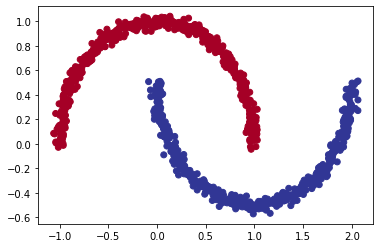

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [8]:
import tensorflow as tf
import numpy as np

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
   tf.keras.layers.Dense(6,activation= 'relu'),
   tf.keras.layers.Dense(6,activation= 'relu'),
   tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model.fit(X,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.5540
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6960
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.7490
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.7850
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.8210
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8420
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8610
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8720
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8760
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8840
Epoch 11/50
32/32 [

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.8930


[0.20183773338794708, 0.8930000066757202]

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


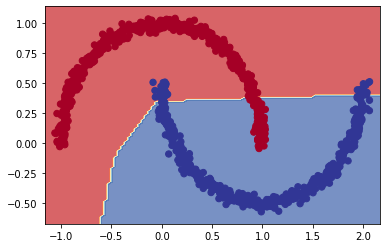

In [12]:
plot_decision_boundary(model,X,y)

##Q4

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
X_train_norm = X_train /255.0
X_test_norm = X_test /255.0

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(X_train_norm,
                            y_train,
                            epochs=20,
                            validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1387 - accuracy: 0.6172 - val_loss: 0.7094 - val_accuracy: 0.7923
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6329 - accuracy: 0.8055 - val_loss: 0.6208 - val_accuracy: 0.8033
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5567 - accuracy: 0.8186 - val_loss: 0.5633 - val_accuracy: 0.8092
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5170 - accuracy: 0.8274 - val_loss: 0.5542 - val_accuracy: 0.8105
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4939 - accuracy: 0.8317 - val_loss: 0.5324 - val_accuracy: 0.8181
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4768 - accuracy: 0.8378 - val_loss: 0.5374 - val_accuracy: 0.8167
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4647 - accuracy: 0.8405 - val_loss: 0.5004 - val_accuracy:

In [22]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [26]:
Labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


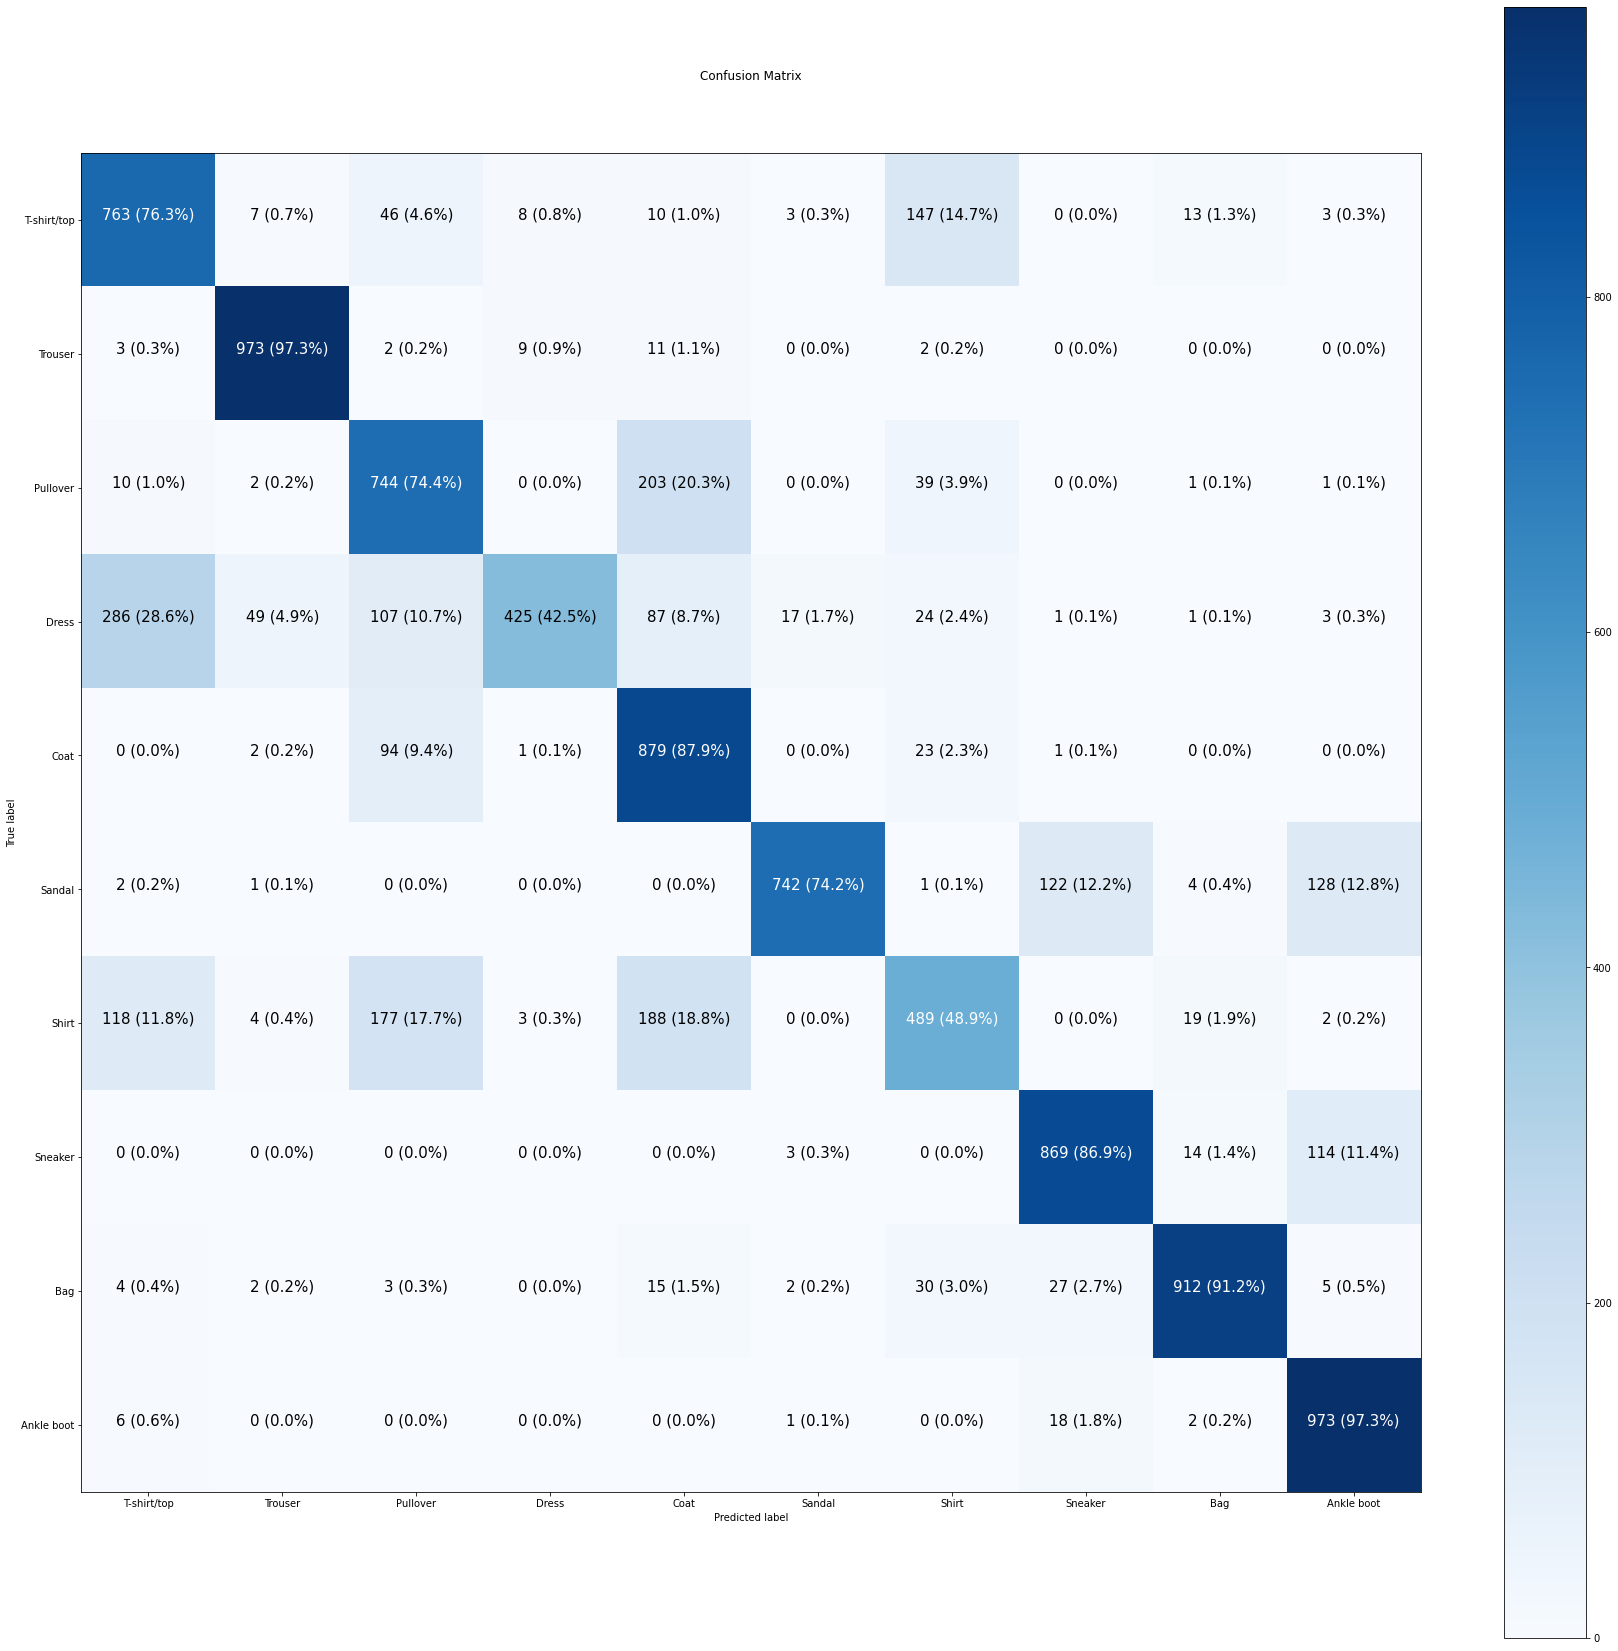

In [30]:
y_probs = model_12.predict(X_test)
y_preds = y_probs.argmax(axis =1)
make_confusion_matrix(y_test,y_preds,classes=Labels,figsize=(30,30))